In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [3]:
dataset['gmv'] = dataset['quantity']*dataset['item_price']

In [4]:
dataset['order_id'] = dataset['order_id'].astype('object')
dataset['product_id'] = dataset['product_id'].astype('object')
dataset['customer_id'] = dataset['customer_id'].astype('object')

In [5]:
dataset['order_date']

0       2019-10-17
1       2019-10-24
2       2019-11-03
3       2019-08-19
4       2019-10-16
           ...    
4995    2019-12-01
4996    2019-07-28
4997    2019-10-23
4998    2019-10-17
4999    2019-11-24
Name: order_date, Length: 5000, dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   object
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   object
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
 9   gmv          5000 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [9]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   object
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   object
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
 9   gmv          5000 non-null   int64 
 10  order_month  5000 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.8+ KB


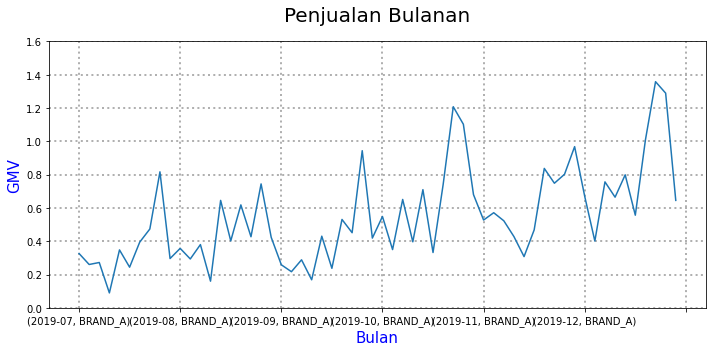

In [8]:
#Jika tidak di unstack
dataset.groupby(['order_month','brand'])['gmv'].sum().plot()
plt.title('Penjualan Bulanan', loc='center', pad=20,fontsize=20)
plt.ylabel('GMV',fontsize=15,color='blue')
plt.xlabel('Bulan',fontsize=15,color='blue')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000))
plt.ylim(ymin=0)
plt.grid(linestyle='dotted',linewidth=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

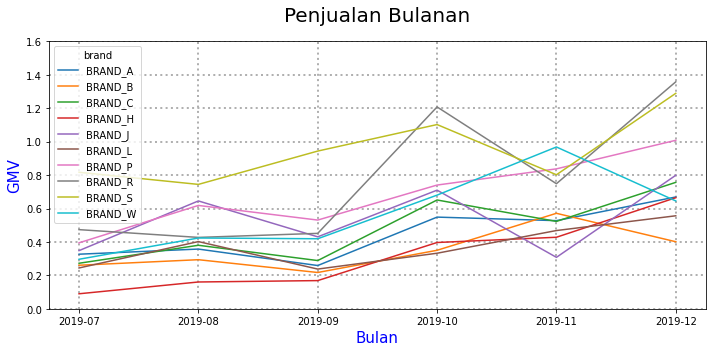

In [17]:
#Buatan sendiri
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Penjualan Bulanan', loc='center', pad=20,fontsize=20)
plt.ylabel('GMV',fontsize=15,color='blue')
plt.xlabel('Bulan',fontsize=15,color='blue')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000))
plt.ylim(ymin=0)
plt.grid(linestyle='dotted',linewidth=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

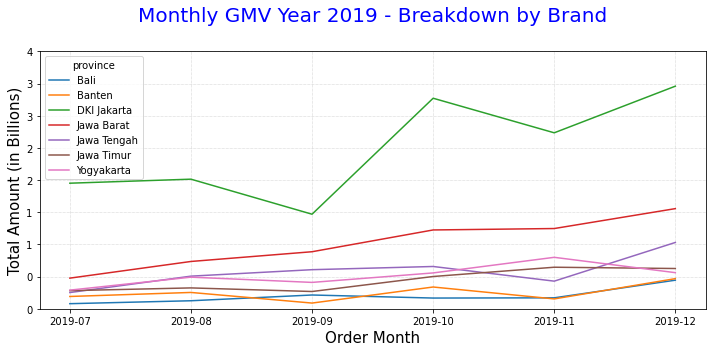

In [18]:
#Copas dqlab
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

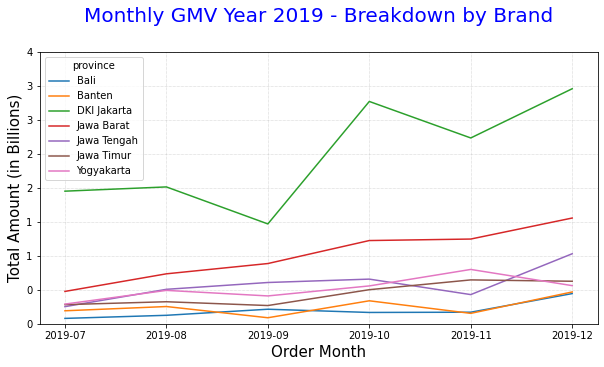

In [19]:
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10,5)
plt.show()

<Figure size 432x288 with 0 Axes>

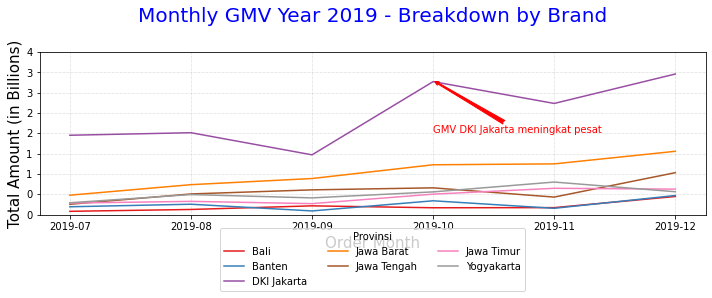

In [55]:
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center',title='Provinsi',bbox_to_anchor=(0.5,-0.5),ncol=3)
plt.annotate('GMV DKI Jakarta meningkat pesat',xy=(3,3300000000),
			 xytext=(3,2000000000),color='red',
arrowprops=dict(arrowstyle='fancy',
			   connectionstyle='arc3',
				color='red'))
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()